# Patient-Data-Simulation-and-Analysis

### Import necessary libraries & read into csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./data/healthcare_synthetic_data.csv")

# Add a count column for aggregation
data["count"] = 1
data.head()

,patient_id,age,gender,treatment_type,treatment_duration,treatment_cost,patient_satisfaction,count
0,P1,21,Female,Medication,22,2556.09,8,1
1,P2,52,Male,Surgery,3,4326.60,7,1
2,P3,65,Female,Medication,26,1178.28,7,1
3,P4,61,Male,Surgery,5,873.14,8,1
4,P5,28,Female,Surgery,22,3125.53,1,1


### Task 1: Treatment Type vs Average Treatment Cost

##### Group by treatment type and calculate the sum of treatment costs and the count

In [2]:
grouped_data = data.groupby("treatment_type").agg(
    total_cost=pd.NamedAgg(column='treatment_cost', aggfunc='sum'),
    count=pd.NamedAgg(column='treatment_type', aggfunc='count')
)

##### Calculate the average treatment cost

In [3]:
grouped_data['average_cost'] = (grouped_data['total_cost'] / grouped_data['count']).round(2)
grouped_data

,total_cost,count,average_cost
treatment_type,,,
Medication,907736.38,333,2725.94
Surgery,927805.08,332,2794.59
Therapy,938191.86,335,2800.57


#### Plot a bar graph

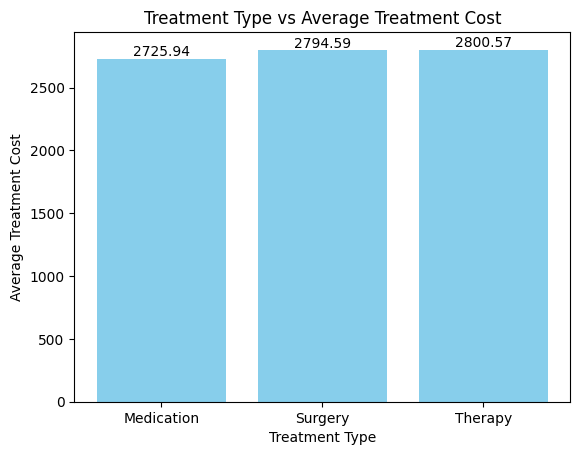

In [4]:
plt.bar(grouped_data.index, grouped_data["average_cost"], color="skyblue")
for x, y in enumerate(grouped_data['average_cost']):
    plt.text(x, y + 25, str(round(y, 2)), ha='center')
plt.title('Treatment Type vs Average Treatment Cost')
plt.xlabel('Treatment Type')
plt.ylabel('Average Treatment Cost')
plt.show()

### Task 2: Gender distribution among patients

##### Group by gender and count the occurrences

In [5]:
grouped_by_gender = data.groupby("gender").agg(
    count=pd.NamedAgg(column='count', aggfunc='count')
)
genders = grouped_by_gender.index
grouped_by_gender.head()

,count
gender,
Female,489
Male,511


##### Create the pie chart

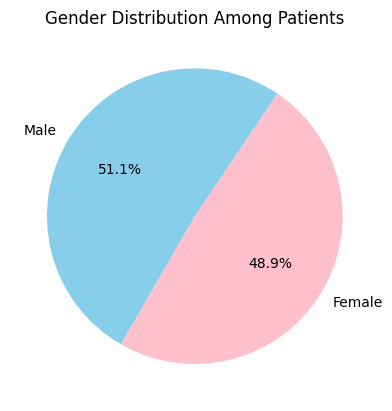

In [6]:
plt.pie(grouped_by_gender['count'], labels=genders, colors=["pink", "skyblue"], autopct='%1.1f%%', startangle=240)
plt.title("Gender Distribution Among Patients")
plt.show()

### Task 3: Age vs Average Treatment Duration

##### Group by age and calculate the median treatment duration

In [7]:
grouped = data.groupby("age").agg(
    treatment_duration = pd.NamedAgg(column="treatment_duration", aggfunc="median")
)
ages = grouped.index

##### Plot a line chart

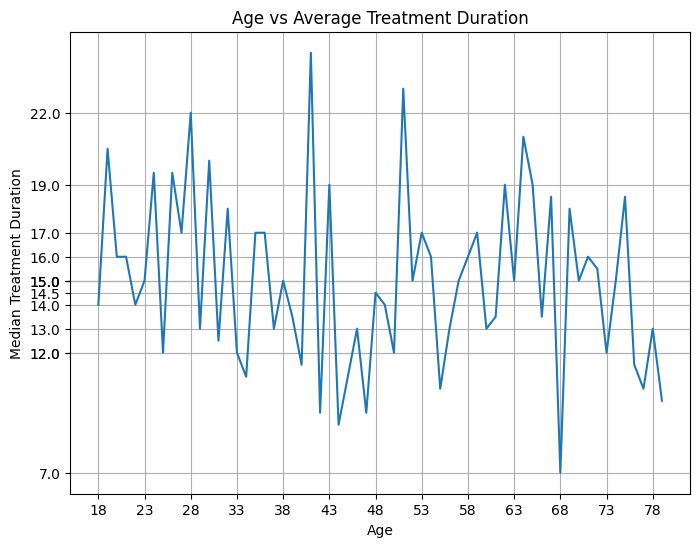

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(ages, grouped["treatment_duration"])
plt.grid()

plt.xticks(ages[::5])
plt.yticks(grouped["treatment_duration"][::5])

plt.title("Age vs Average Treatment Duration")
plt.xlabel('Age')
plt.ylabel('Median Treatment Duration')

plt.show()

### Task 4: Distribution of Patient Satisfaction scores

##### Group by satisfaction and calculate the count for each satisfaction

In [9]:
grouped = data.groupby("patient_satisfaction").agg(
    patient_satisfaction_count = pd.NamedAgg(column="count", aggfunc="count")
)

##### Plot a bar graph

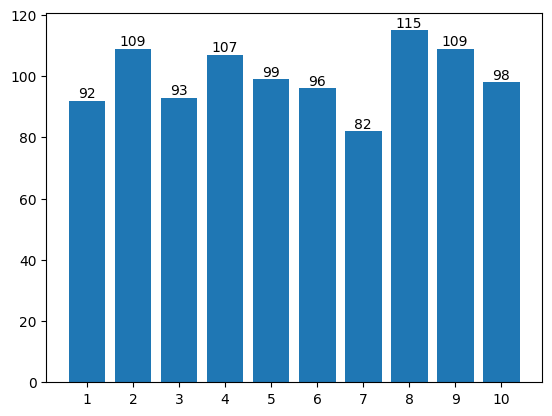

In [10]:
plt.bar(grouped.index, grouped["patient_satisfaction_count"])
for x, y in zip(grouped.index, grouped["patient_satisfaction_count"]):
    plt.text(x, y + 1, str(y), ha='center')
plt.xticks(grouped.index)
plt.show()